

Introduction to the MNIST dataset


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder



from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.datasets import fetch_openml

In [2]:
digits = fetch_openml('mnist_784')

In [3]:


X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)




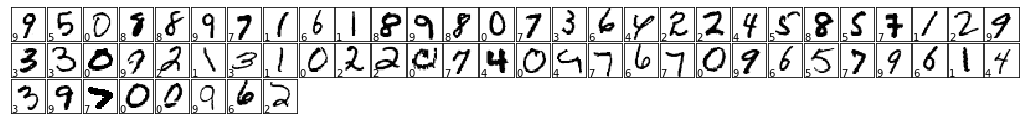

In [4]:
fig = plt.figure(figsize=(14, 14))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):

    img = X_train[i].reshape((28,28))
    ax = fig.add_subplot(28, 28, i + 1, xticks=[], yticks=[])
    ax.imshow(img, cmap="Greys")
    ax.text(0, 27, str(y_train[i]))
    


In [53]:
onehot_encoder = OneHotEncoder(categories='auto', sparse=False)


# visualization and classification of the digits dataset


Softmax function performs the logistic function, so that if it receives an ndarray of dimensions with vectors, it returns the matrix of the same dimensions with the logistic calculation for each matrix 

In [54]:
def softmax(x):
    
    x = x.T #  Transposition 
    x = x - np.max(x, axis=0) #  Spillover countermeasures 
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T

 loss function, which is the sum of the costs for each output of the N logistic regressions 
 

In [55]:
def loss(X, Y, W):
    
    Z = - X @ W
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

Calculation of the gradient for the softmax regression 
    
    param w: ndarray of dimension  with the parameters
    param x: ndarray of dimension  with the data
    param y: ndarray of dimension  with the class for each data
    param mu: constant
    return: An ndarray of the same dimensions as theta(dataframe is returned)

In [56]:
def gradient(X, Y, W, mu):
    
    Z = - X @ W
    P = softmax(Z)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) + 2 * mu * W
    return gd

In [57]:
def evaluate(X, Y, max_iter=500, eta=0.01, mu=0.1):
    
    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
    W = np.zeros((X.shape[1], Y_onehot.shape[1]))
    step = 0
    step_lst = [] 
    loss_lst = []
    W_lst = []
 
    while step < max_iter:
        step += 1
        W -= eta * gradient(X, Y_onehot, W, mu)
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss(X, Y_onehot, W))

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, W

this is our model class to fit and predict the data

In [58]:

class Modelclass:
    def fit(self, X, Y):
        self.loss_steps, self.W = evaluate(X, Y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            
        )

    def predict(self, H):
        # Z = np.dot(H,self.W)
        Z = - H @ self.W
        P = softmax(Z)
        return np.argmax(P, axis=1)
    


# split the data into training and validation sets

# then train the model

In [9]:





model = Modelclass()
model.fit(X_train, y_train)



# use the model to predict the labels of the test data

In [10]:

predicted = model.predict(X_test)
expected = y_test

print(predicted.shape)
print(expected.shape)


(450,)
(450,)


# Loss graph 


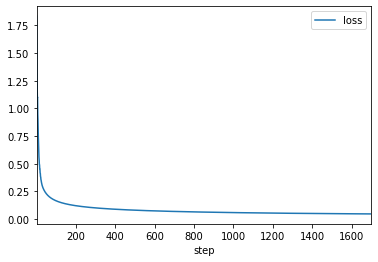

In [11]:

model.loss_plot()

 performance
------------------------

we find  ration of correct predictions


thus correct matches by total number of data points



In [12]:
def model_score(expected, predicted):
    matches = (predicted == expected)
    

    return matches.sum() / float(len(matches))

In [13]:
print(f'score of the model : {model_score(expected, predicted)}')

score of the model : 0.9644444444444444


In [14]:

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.95      0.93      0.94        42
           2       1.00      1.00      1.00        49
           3       0.97      0.97      0.97        34
           4       0.97      0.95      0.96        39
           5       0.98      0.98      0.98        51
           6       0.97      1.00      0.99        37
           7       1.00      0.98      0.99        55
           8       0.84      0.95      0.89        39
           9       0.94      0.90      0.92        52

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450



# the confusion matrix



In [15]:
cf_matrix=confusion_matrix(expected, predicted)
import seaborn as sns
import matplotlib.pyplot as plt

print(cf_matrix)

[[51  0  0  0  0  1  0  0  0  0]
 [ 0 39  0  0  0  0  1  0  2  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  0  1  1]
 [ 0  0  0  0  0 50  0  0  0  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  0  0  1  0  0  0 37  0]
 [ 0  1  0  1  0  0  0  0  3 47]]


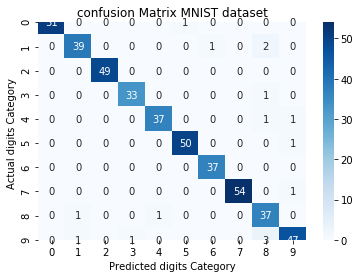

In [16]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('confusion Matrix MNIST dataset')
ax.set_xlabel('Predicted digits Category')
ax.set_ylabel('Actual digits Category ')

## Ticket labels - List 
ax.xaxis.set_ticklabels(['0','1', '2','3','4','5','6','7','8','9'])
ax.yaxis.set_ticklabels(['0','1', '2','3','4','5','6','7','8','9'])
plt.show()

#This method labels images with predicted values 
colour green indicates labelled correctly and colour red indicates to image was labelled incorrectly

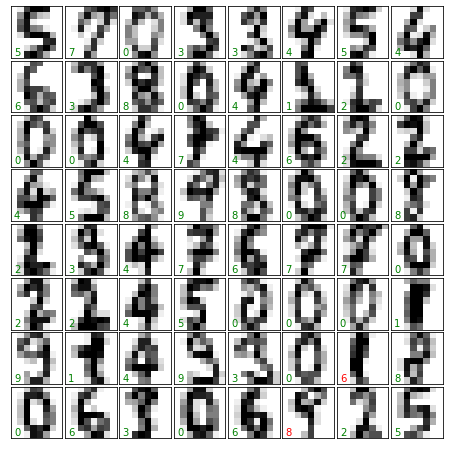

In [17]:

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')
